# IESB - CIA035 - Aula 05
# Random Forest x GBM x XGBoost x AdaBoost x CatBoost

Todos os métodos usam, basicamente, `árvore de decisão` como modelo de base e são chamados de `métodos ensemble`, que se caracterizam como métodos que procuram usar modelos mais simples/fracos de forma conjunta para melhorar o desempenho do modelo principal.

## Random Forest
Para obter melhor resultado, o algoritimo de RF vai criar diversas `árvores de decisão` (parâmetro `n_estimators`) e chegar ao resultado final com base no resultado de cada árvore criada. A idéia básica é separar o conjunto de dados diversas vezes e para cada sub-conjunto treinar um novo regressor/classificador.  Os diferentes regressores/classificadores irão produzir resultados diferentes, e o resultado final será determinado com base nessas regressões/classificações individuais.

## Gradient Boosting
GBM é um método de `boosting`, também construído em cima de regressores/classificadores fracos. A idéia é adicionar um regressor/classificador de cada vez, então o próximo regressor/classificador é treinado para melhorar o resultado atingido até o momento ('soma de resultados'). Ao contrário do RF, que treina cada regressor/classificador de forma independente, no GBM eles são treinados em conjunto, um ligado ao outro.

## XGBoost
XGB é uma implementação específica do GBM, dita melhor e mais rápida que a implementação padrão do scikit-learn. Tanto o GBM quanto o XGB precisam de maior trabalho de interpretação dos dados e `tunning` do modelo.

## AdaBoost
Inicialmente o modelo é treinado nos dados originais e então cópias desse modelo são treinadas no mesmo conjunto dados mas com ajuste de peso em cima das ocorrências classificadas incorretamente, de forma que os modelos subsequentes tenham foco nos casos mais difícies de serem previstos.

## CatBoost
É um modelo mais otimizado de boosting usando árvores de decisão que tem a vantagem de trabalhar com `dados categóricos`, eliminando a necessidade de pré-processamento, além de ser otimizado para execução em `GPU`.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd

# Verificando os arquivos
import os
print(os.listdir("../input"))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [2]:
# Carregando os dados
df = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
# Verificando os tipos e os valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Para corrigir o TotalCharges vamos trocar o espaço em branco
# pelo valor ZERO e forçar a conversão
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '0').astype(float)

In [5]:
# Guardando as colunas categóricas para execução do CatBoost
df2 = df.copy()

In [6]:
# Transformar texto em número
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


In [8]:
# Dividindo o DataFrame
from sklearn.model_selection import train_test_split

# Treino e teste
train, test = train_test_split(df, test_size=0.15, random_state=42)

# Veificando o tanho dos DataFrames
train.shape, test.shape

((5986, 21), (1057, 21))

In [9]:
# Selecionado as features
feats = [c for c in df.columns if c not in ['customerID', 'Churn']]

In [10]:
# Trabalhando com RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=4, random_state=42)
rf.fit(train[feats], train['Churn'])
accuracy_score(test['Churn'], rf.predict(test[feats]))

0.7947019867549668

In [11]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [12]:
# Trabalhando com GBM
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=42)
gbm.fit(train[feats], train['Churn'])
accuracy_score(test['Churn'], gbm.predict(test[feats]))

0.8136234626300851

In [13]:
# Trabalhando com XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=42, use_label_encoder=False)
xgb.fit(train[feats], train['Churn'])
accuracy_score(test['Churn'], xgb.predict(test[feats]))

[00:41:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8088930936613056

In [14]:
# Trabalhando com AdaBoost
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42)
abc.fit(train[feats], train['Churn'])
accuracy_score(test['Churn'], abc.predict(test[feats]))

0.8126773888363292

In [15]:
# Trabalhando com CatBoost
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(random_state=42)
cbc.fit(train[feats], train['Churn'])
accuracy_score(test['Churn'], cbc.predict(test[feats]))

Learning rate set to 0.022119
0:	learn: 0.6776853	total: 59.4ms	remaining: 59.3s
1:	learn: 0.6631697	total: 63.3ms	remaining: 31.6s
2:	learn: 0.6492699	total: 66.9ms	remaining: 22.2s
3:	learn: 0.6371898	total: 70.7ms	remaining: 17.6s
4:	learn: 0.6256090	total: 74ms	remaining: 14.7s
5:	learn: 0.6143412	total: 77.4ms	remaining: 12.8s
6:	learn: 0.6046773	total: 80.4ms	remaining: 11.4s
7:	learn: 0.5951026	total: 84.1ms	remaining: 10.4s
8:	learn: 0.5854404	total: 87.8ms	remaining: 9.66s
9:	learn: 0.5760580	total: 91.4ms	remaining: 9.05s
10:	learn: 0.5674574	total: 95.1ms	remaining: 8.55s
11:	learn: 0.5593669	total: 98.8ms	remaining: 8.13s
12:	learn: 0.5522568	total: 102ms	remaining: 7.78s
13:	learn: 0.5457502	total: 106ms	remaining: 7.49s
14:	learn: 0.5401630	total: 110ms	remaining: 7.22s
15:	learn: 0.5338482	total: 114ms	remaining: 7s
16:	learn: 0.5282714	total: 118ms	remaining: 6.83s
17:	learn: 0.5223869	total: 122ms	remaining: 6.65s
18:	learn: 0.5183504	total: 125ms	remaining: 6.43s
19:	

0.8051087984862819

In [16]:
# Criando uma lista de colunas categoricas
cat_cols = [c for c in df2.columns if ((df2[c].dtype == 'object') and (c not in ['customerID', 'Churn']))]

cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [17]:
# Verificando os tipos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# Usando o CatBoost com o dataframe sem processamento

# Treino 2 e teste 2
train2, test2 = train_test_split(df2, test_size=0.15, random_state=42)

cbc2 = CatBoostClassifier(random_state=42, cat_features=cat_cols)
cbc2.fit(train2[feats], train2['Churn'])
accuracy_score(test2['Churn'], cbc2.predict(test2[feats]))

Learning rate set to 0.022119
0:	learn: 0.6787162	total: 15.9ms	remaining: 15.9s
1:	learn: 0.6652437	total: 27.1ms	remaining: 13.5s
2:	learn: 0.6525428	total: 41.8ms	remaining: 13.9s
3:	learn: 0.6400202	total: 53.3ms	remaining: 13.3s
4:	learn: 0.6282769	total: 68.9ms	remaining: 13.7s
5:	learn: 0.6169042	total: 81.1ms	remaining: 13.4s
6:	learn: 0.6063325	total: 91.8ms	remaining: 13s
7:	learn: 0.5965348	total: 104ms	remaining: 12.9s
8:	learn: 0.5871673	total: 115ms	remaining: 12.7s
9:	learn: 0.5797144	total: 124ms	remaining: 12.3s
10:	learn: 0.5715065	total: 136ms	remaining: 12.2s
11:	learn: 0.5651436	total: 146ms	remaining: 12s
12:	learn: 0.5578042	total: 157ms	remaining: 11.9s
13:	learn: 0.5507324	total: 168ms	remaining: 11.8s
14:	learn: 0.5455678	total: 176ms	remaining: 11.6s
15:	learn: 0.5403511	total: 184ms	remaining: 11.3s
16:	learn: 0.5344519	total: 194ms	remaining: 11.2s
17:	learn: 0.5302027	total: 199ms	remaining: 10.9s
18:	learn: 0.5242642	total: 212ms	remaining: 10.9s
19:	lear

0.8145695364238411

<AxesSubplot:>

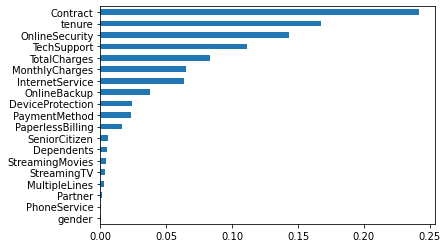

In [19]:
# Feature Importance com RF
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

<AxesSubplot:>

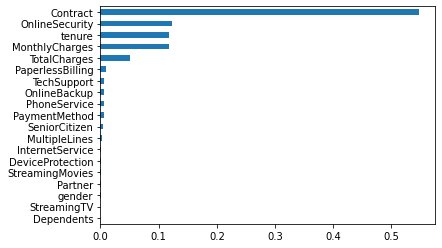

In [20]:
# Feature Importance com GBM
pd.Series(gbm.feature_importances_, index=feats).sort_values().plot.barh()

<AxesSubplot:>

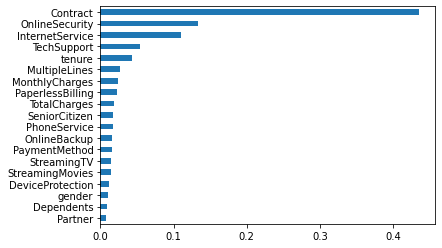

In [21]:
# Feature Importance com XGB
pd.Series(xgb.feature_importances_, index=feats).sort_values().plot.barh()

<AxesSubplot:>

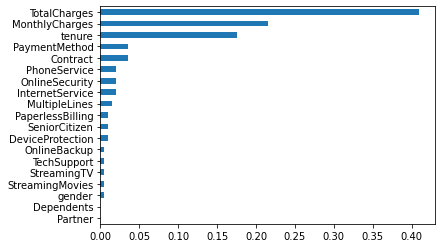

In [22]:
# Feature Importance com AdaBoost
pd.Series(abc.feature_importances_, index=feats).sort_values().plot.barh()

<AxesSubplot:>

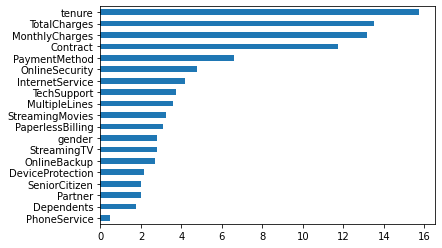

In [23]:
# Feature Importance com CatBoost
pd.Series(cbc.feature_importances_, index=feats).sort_values().plot.barh()

<AxesSubplot:>

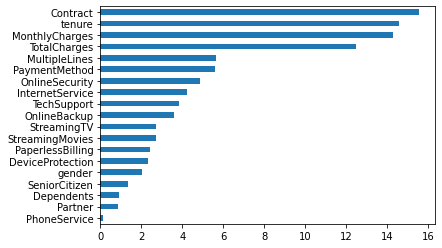

In [24]:
# Feature Importance com CatBoost (usando dados categóricos)
pd.Series(cbc2.feature_importances_, index=feats).sort_values().plot.barh()